In [142]:
import numpy as np
import matplotlib.pyplot as plt

In [143]:
#data generator
def generate_linear(n=100):
    pts = np.random.uniform(0, 1, (n, 2))
    inputs = []
    labels = []
    for pt in pts:
        inputs.append([pt[0], pt[1]])
        distance = (pt[0]-pt[1])/1.414
        if pt[0] > pt[1]:
            labels.append(0)
        else:
            labels.append(1)
    return np.array(inputs), np.array(labels).reshape(n, 1)

def generate_XOR_easy():
    inputs = []
    labels = []
    for i in range(11):
        inputs.append([0.1*i, 0.1*i])
        labels.append(0)
        
        if 0.1*i == 0.5:
            continue
        inputs.append([0.1*i, 1-0.1*i])
        labels.append(1)
    return np.array(inputs), np.array(labels).reshape(21, 1)

In [144]:
# visualize
def show_result(x, y, pred_y):
    plt.subplot(1,2,1)
    plt.title('Ground truth', fontsize=18)
    for i in range(x.shape[0]):
        if y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
    
    plt.subplot(1,2,2)
    plt.title('Predict result', fontsize=18)
    for i in range(x.shape[0]):
        if pred_y[i] < 0.01:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
    
    plt.show()

In [145]:
# sigmoid funtion
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def derivative_sigmoid(x):
    return np.multiply(x, 1.0 - x)

In [146]:
# training network
def train(x, y, lr=0.01, n1=4, n2=4, epoch=1000000):
    # parameters
    num = x.shape[0]
    learning_rate = lr
    input_dim = x.shape[1]
    h1_node_num, h2_node_num = n1, n2
    output_dim = y.shape[1]
    
    w1 = np.random.rand(input_dim, h1_node_num) 
    w2 = np.random.rand(h1_node_num, h2_node_num) 
    w3 = np.random.rand(h2_node_num, output_dim) 
    output = 0
    
    for j in range(epoch):
        # forward
        z1 = sigmoid(np.dot(x, w1))
        z2 = sigmoid(np.dot(z1, w2)) 
        y_pred = sigmoid(np.dot(z2, w3)) 

        # calculate loss
        loss = y_pred - y 
        
        # calculate gradient
        theta3 = loss * derivative_sigmoid(y_pred)
        grad_w3 = np.dot(z2.T, theta3)
        theta2 = np.dot(theta3, w3.T) * derivative_sigmoid(z2)
        grad_w2 = np.dot(z1.T, theta2)
        theta1 = np.dot(theta2, w2.T) * derivative_sigmoid(z1)
        grad_w1 = np.dot(x.T, theta1)
        
        # update parameters
        w1 -= grad_w1 * learning_rate
        w2 -= grad_w2 * learning_rate
        w3 -= grad_w3 * learning_rate
        
        if j%10000 == 0:
            print('epoch:', j, 'loss:', np.power(loss, 2).sum() / num)
    return w1, w2, w3

In [147]:
def test(x, y, w1, w2, w3): 
    z1 = sigmoid(np.dot(x, w1))
    z2 = sigmoid(np.dot(z1, w2)) 
    y_pred = sigmoid(np.dot(z2, w3))  
    loss = y_pred - y 
    print('loss:', np.power(loss, 2).sum() / x.shape[0])
    return y_pred

In [148]:
# training
x_train1, y_train1 = generate_XOR_easy()
W1 = train(x_train1, y_train1)

epoch: 0 loss: 0.3284519840744095
epoch: 10000 loss: 0.24939169265956773
epoch: 20000 loss: 0.24920897621615867
epoch: 30000 loss: 0.2481630736691021
epoch: 40000 loss: 0.21234700458708455
epoch: 50000 loss: 0.03430512220859389
epoch: 60000 loss: 0.007387316720567995
epoch: 70000 loss: 0.0024870254243080144
epoch: 80000 loss: 0.0012788087606831035
epoch: 90000 loss: 0.0008096846618311653
epoch: 100000 loss: 0.0005747235526043128
epoch: 110000 loss: 0.00043776495717593
epoch: 120000 loss: 0.0003496236124340348
epoch: 130000 loss: 0.00028883390695699193
epoch: 140000 loss: 0.000244717937173455
epoch: 150000 loss: 0.0002114308901667729
epoch: 160000 loss: 0.00018553159700407544
epoch: 170000 loss: 0.00016487449603932474
epoch: 180000 loss: 0.0001480584933347792
epoch: 190000 loss: 0.00013413311338835365
epoch: 200000 loss: 0.00012243266005616758
epoch: 210000 loss: 0.00011247807451026839
epoch: 220000 loss: 0.00010391647379381778
epoch: 230000 loss: 9.648259594505184e-05
epoch: 240000 los

loss: 1.2680879134875174e-05


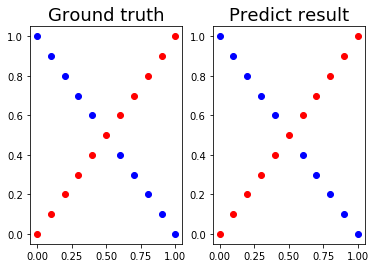

In [149]:
# testing
x_test1, y_test1 = generate_XOR_easy()
y_pred1 = test(x_test1, y_test1, W1[0], W1[1], W1[2])

show_result(x_test1, y_test1, y_pred1)

In [150]:
y_pred1

array([[1.27282756e-04],
       [9.99964054e-01],
       [5.42497211e-04],
       [9.99963554e-01],
       [2.13386339e-03],
       [9.99961039e-01],
       [5.23130701e-03],
       [9.99935980e-01],
       [6.91889420e-03],
       [9.91590676e-01],
       [5.53652444e-03],
       [3.32369273e-03],
       [9.91700103e-01],
       [1.81414319e-03],
       [9.99941163e-01],
       [1.01651731e-03],
       [9.99963533e-01],
       [6.17836013e-04],
       [9.99965304e-01],
       [4.12652473e-04],
       [9.99965278e-01]])

In [151]:
# training
x_train2, y_train2 = generate_linear()
W2 = train(x_train2, y_train2)

epoch: 0 loss: 0.364671209145478
epoch: 10000 loss: 0.0016475645904444564
epoch: 20000 loss: 0.0006226303975475276
epoch: 30000 loss: 0.0003475164060321298
epoch: 40000 loss: 0.00022967146683641342
epoch: 50000 loss: 0.00016688738390171505
epoch: 60000 loss: 0.0001288268404205376
epoch: 70000 loss: 0.0001036898075455828
epoch: 80000 loss: 8.604349233699983e-05
epoch: 90000 loss: 7.307720193155936e-05
epoch: 100000 loss: 6.32064052387582e-05
epoch: 110000 loss: 5.547685426343517e-05
epoch: 120000 loss: 4.928296153417174e-05
epoch: 130000 loss: 4.422367503024439e-05
epoch: 140000 loss: 4.00238396659901e-05
epoch: 150000 loss: 3.648896542339582e-05
epoch: 160000 loss: 3.347803362070797e-05
epoch: 170000 loss: 3.08865204155884e-05
epoch: 180000 loss: 2.8635449121826097e-05
epoch: 190000 loss: 2.6664127934148736e-05
epoch: 200000 loss: 2.492521121713453e-05
epoch: 210000 loss: 2.3381266181743732e-05
epoch: 220000 loss: 2.2002338745106422e-05
epoch: 230000 loss: 2.07641970863163e-05
epoch: 2

loss: 0.003813096977558076


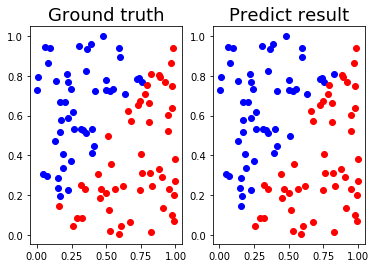

In [152]:
# testing
x_test2, y_test2 = generate_linear()
y_pred2 = test(x_test2, y_test2, W2[0], W2[1], W2[2])

show_result(x_test2, y_test2, y_pred2)

In [153]:
y_pred2

array([[9.99998694e-01],
       [9.99998699e-01],
       [9.99998583e-01],
       [3.51598937e-02],
       [9.99998626e-01],
       [9.99998031e-01],
       [2.42001110e-05],
       [9.99998289e-01],
       [9.92921593e-01],
       [9.96210068e-01],
       [1.61042921e-06],
       [9.99998504e-01],
       [9.99998636e-01],
       [1.48854296e-06],
       [9.99998529e-01],
       [9.99998669e-01],
       [9.99997793e-01],
       [9.99998703e-01],
       [9.47483642e-04],
       [9.99998665e-01],
       [9.99998519e-01],
       [1.58705827e-06],
       [1.49714211e-06],
       [1.45082735e-06],
       [3.03560603e-05],
       [9.99998681e-01],
       [2.62138659e-05],
       [9.99997805e-01],
       [7.41781161e-06],
       [1.48402410e-06],
       [1.49870153e-06],
       [9.99998664e-01],
       [9.34852775e-01],
       [9.99998680e-01],
       [9.99998536e-01],
       [1.66829270e-06],
       [1.93968059e-06],
       [3.13468960e-06],
       [1.48137308e-06],
       [1.65084346e-06],
